## Курсовой проект для курса "Python для Data Science"

### Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

#### Подключение зависимостей

In [274]:
import pandas as pd
import numpy as np

#### Загрузка данных

In [275]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Первичная обработка

In [276]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [277]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Явно проблемные данные:
- Rooms min=0. Подозрительно нулевое количество комнат.
- Square min=1.13 Слишком малая площадь для недвижимости. Туалет?
- Square max=641, но LifeSquare max=7480 и KitchenSquare max=2014. Общая площадь меньше, чем жилая и кухни.
- Непонятные цифры в HouseYear.
- Судья по перцентилям и среднему - в Square, LifeSquare и KitchenSquare возможны выбросы.

In [278]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

В LifeSquare и Healthcare_1 присутствуют null.

In [280]:
# Номинативные данные
df_obj_features = df.select_dtypes(include='object')
df_obj_features

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B
...,...,...,...
9995,B,B,B
9996,B,B,A
9997,B,B,A
9998,B,A,B


In [281]:
for feature in df_obj_features.columns:
    print(feature)
    print(f'nunique: {df_obj_features[feature].nunique()}')
    print(f'unique: {df_obj_features[feature].unique()}\n')

Ecology_2
nunique: 2
unique: ['B' 'A']

Ecology_3
nunique: 2
unique: ['B' 'A']

Shops_2
nunique: 2
unique: ['B' 'A']



In [282]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

LifeSquare nulls = 2113. Судя по всему - это коммерческая недвижимость.
Healthcare_1 nulls = 4798. Почти в половине данных признак отсутствует.

### Визуализация и анализ данных

#### Подключение зависимостей

In [283]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [284]:
matplotlib.rcParams.update({'font.size': 14})

In [285]:
target = df['Price']

#### Распределение целевой переменной

In [286]:
def distribution_plot(series, label):
    plt.figure(figsize=(16, 8))

    mean = round(series.mean(), 2)
    median = series.median()

    plt.subplot(121)
    series.hist(density=False, bins=20)
    plt.ylabel('count')
    plt.xlabel(label)

    y = np.linspace(0, 2000, 2)
    plt.plot([mean] * 2, y, label='mean', linewidth=4)
    plt.plot([median] * 2, y, label='median', linewidth=4)
    plt.legend()

    plt.subplot(122)
    sns.kdeplot(series, shade=True, legend=False)
    plt.xlabel(label)

    plt.suptitle(label)
    plt.show()

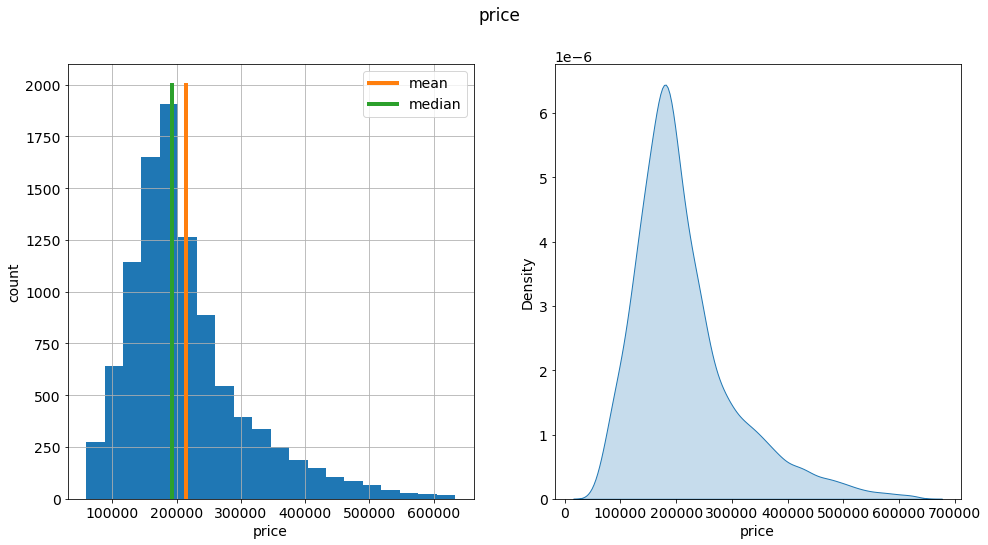

In [287]:
distribution_plot(target, 'price')

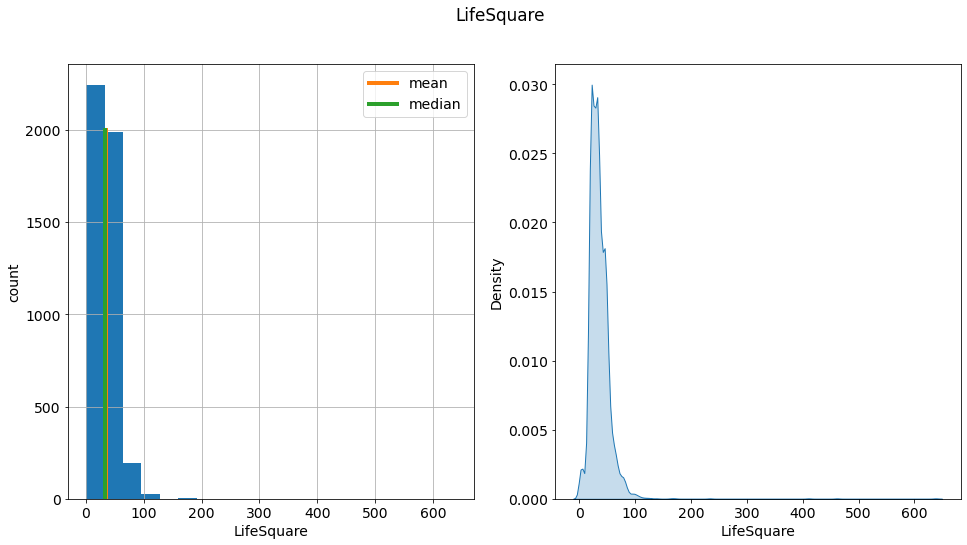

In [288]:
# Распределение LifeSquare
distribution_plot(df.dropna()['LifeSquare'], 'LifeSquare')

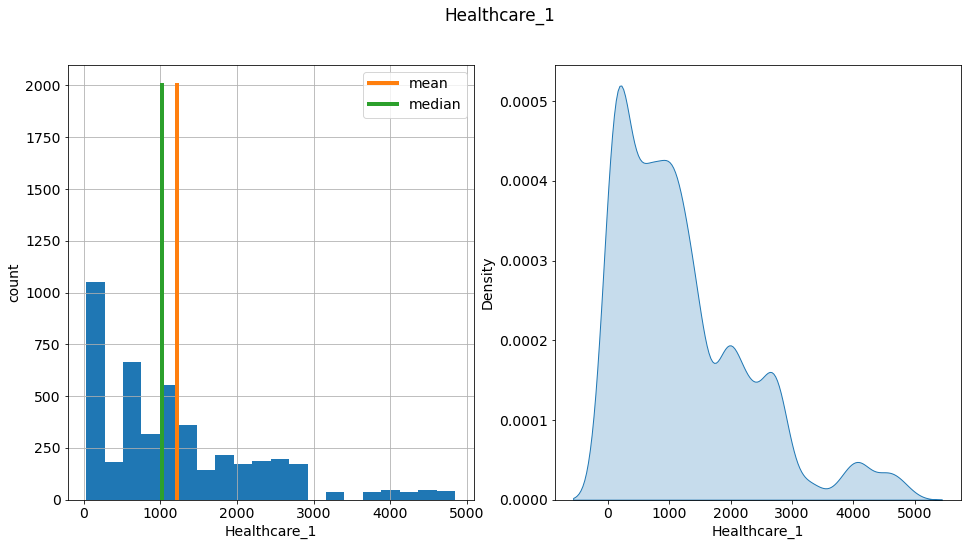

In [289]:
# Распределение Healthcare_1
distribution_plot(df.dropna()['Healthcare_1'], 'Healthcare_1')

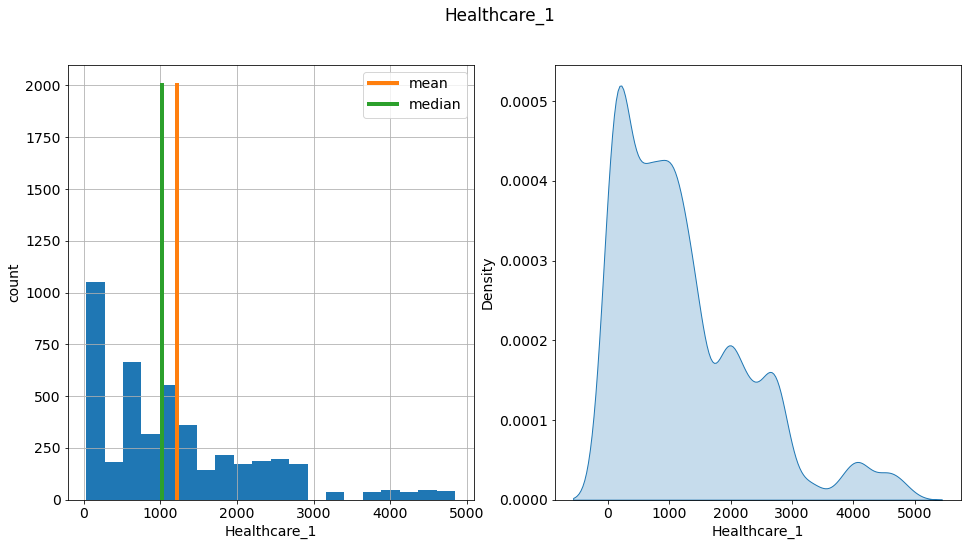

In [290]:
# Распределение Healthcare_1
distribution_plot(df.dropna()['Healthcare_1'], 'Healthcare_1')

### Трансформация данных

In [291]:
# Пропуски

# LifeSquare
df['LifeSquare_nan'] = 0
df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1

# Healthcare_1
df[df['Healthcare_1'].isna()] = df['Healthcare_1'].median()

In [292]:
# Обработка категорий
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,LifeSquare_nan,900.0,A,B,900.0,A,B,900.0,A,B
0,900,900,900.0,900.000000,900.000000,900.0,900,900.0,900,900.000000,...,900,1,0,0,1,0,0,1,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,1,0,0,1,0,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,0,0,1,0,0,1,0,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,0,0,1,0,0,1,0,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,0,0,1,0,0,1,0,0,1


### Анализ признаков

#### Количественные признаки

In [293]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features = df_num_features.drop('Price', axis=1)
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,LifeSquare_nan
0,900,900,900.0,900.000000,900.000000,900.0,900,900.0,900,900.000000,900,900,900,900.0,900,900,900
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,0


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>],
       [<AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>],
       [<AxesSubplot:title={'center':'LifeSquare_nan'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

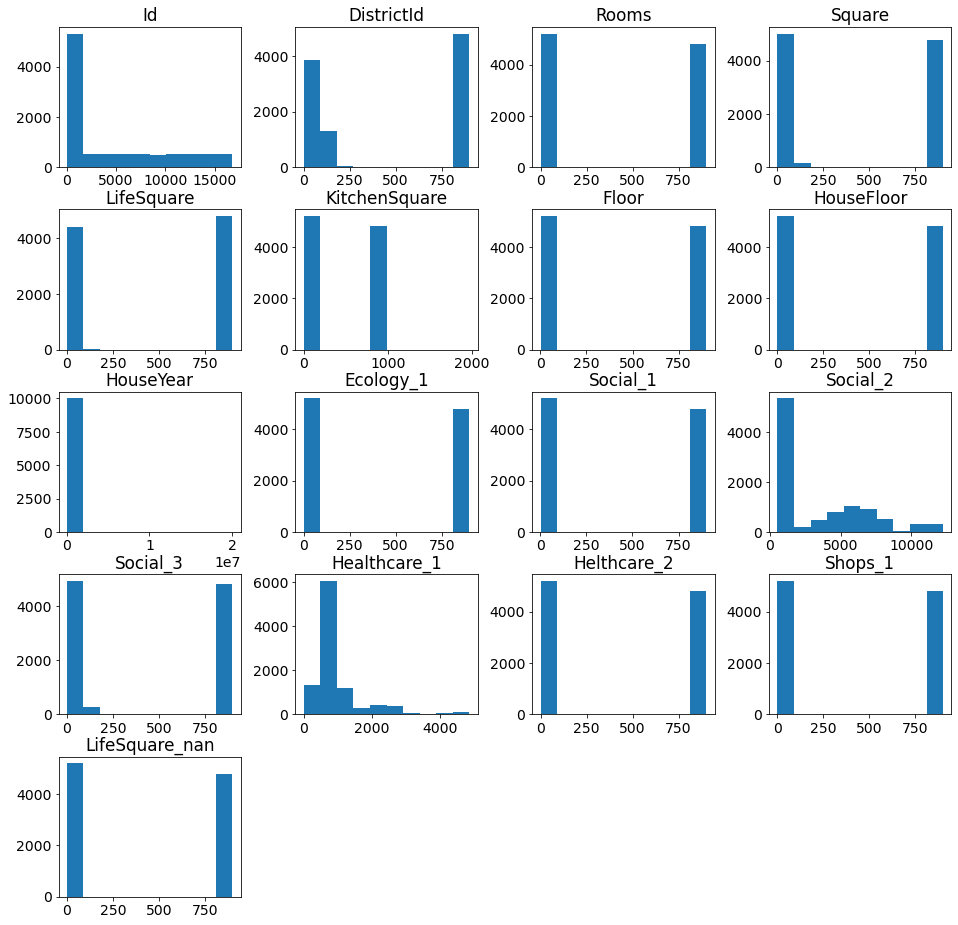

In [294]:
df_num_features.hist(figsize=(16, 16), grid=False)

#### Базовая проверка r2 с помощью линейной регрессии

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = df_num_features.drop(columns=['LifeSquare'])
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.8265242545869147